# **CUSTOMER CHURN ANALYTICS**

In E-commerce business, customer satisfaction is a very important factor. This customer satisfaction greatly affects the customer's risk of churning. Customer churn is a customer who stops using a product or service from a business. The higher the percentage of customers who churn, indicates the business is not okay.

For companies it would be much cheaper to maintain their customer base than to spend resources to get new customers. Therefore, analysis is needed to help businesses make better strategies, build better products, and provide better services to the customers. 

Data analysis is very important to know patterns and trends. Will the customer leave if the service provided is not good? Is the promotion incorrect? Do customers who use the app a lot have a small chance of churn? What are the types of customers who have been loyal to use our products or services? How are the types of customers at risk for churn?

To answer the questions above, we will do an customer analysis project.  We use E-commerce Customer Behavior Dataset from https://www.kaggle.com/ermismbatuhan/digital-marketing-ecommerce-customer-behavior.

## **Stages of the project**

**Part 1 : Exploratory Data Analysis (EDA) :**
1. Analysis of the features.
2. Finding any relations or trends considering multiple features

**Part 2 : Predictive Modeling**
1. Converting features into suitable for modeling.
2. Running Basic Algorithms.

### Import Libraries

In [ ]:
#Processing libraries
import pandas as pd
import numpy as np

#visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Part 1 : Exploratory Data Analysis (EDA):

In [ ]:
df = pd.read_excel('dataecommerce.xlsx')
df.head(3)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

The columns in this dataset have no null values. 

### How many customer churn ?

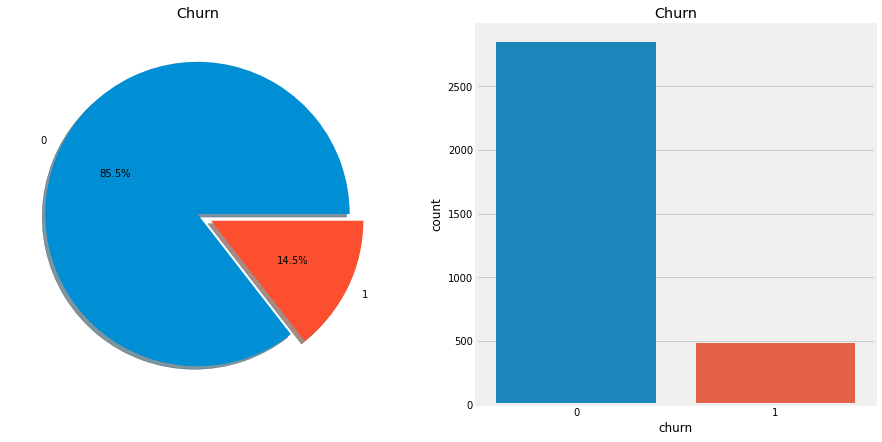

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 7))

#axes[0]
df['churn'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = axes[0], shadow = True)
axes[0].set_title('Churn')
axes[0].set_ylabel('')

#axes[1]
sns.countplot('churn', data = df, ax = axes[1])
axes[1].set_title('Churn')

plt.show()

Of the 3333 customers, only around 500 didn't churned i.e only 14.5% of the total customers. We need to explore more deeply to get insights from data and see the categories of customers who churn and who didn't.

### Analysis of The Features

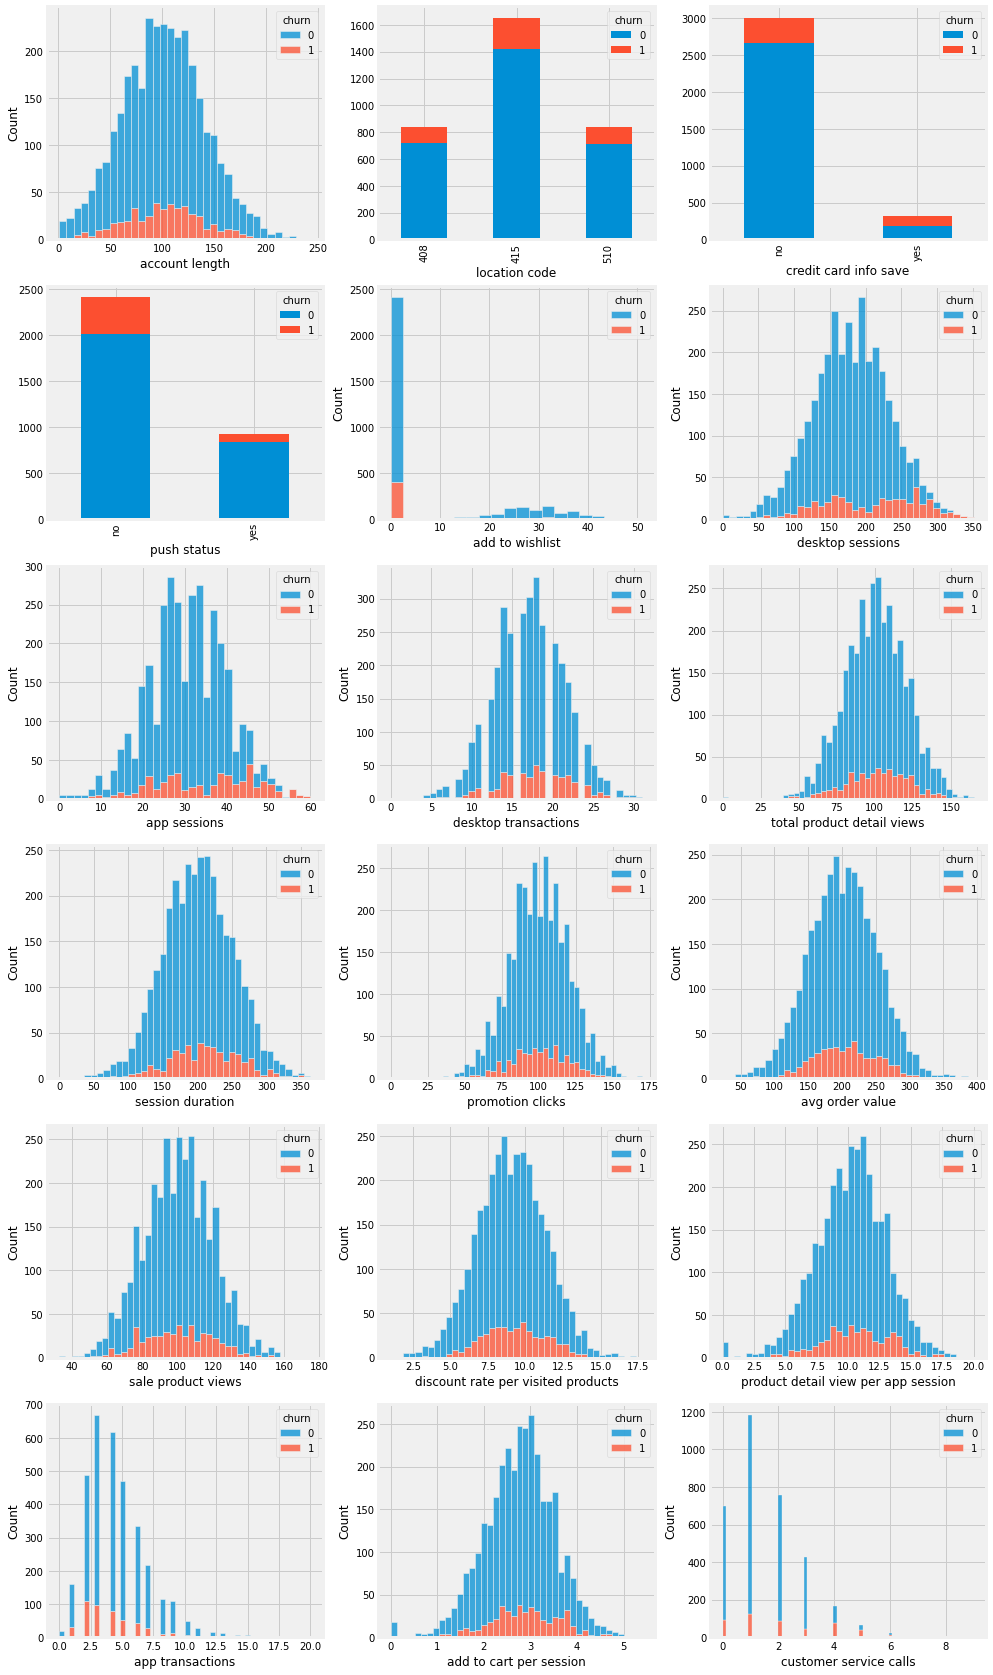

In [ ]:
df['location code'] = df['location code'].map({408:'408',
                                               415:'415',
                                               510:'510'})
i = 0
j = 0
fig, axes = plt.subplots(6, 3, figsize = (15, 30))
for col in df.columns :
  if col != 'user id' and col != 'churn' :
    if df[col].dtypes == 'object' :
      df.groupby([col, 'churn'])['user id'].count().unstack().plot(kind = 'bar', stacked = True, ax = axes[i,j])
    else :
      sns.histplot(data = df, x = col, hue = 'churn', multiple = 'stack', ax = axes[i,j])
    
    if j == 2 :
      j = 0
      i += 1
    else :
      j += 1

From the visualization we have done, the insights we have gained are :
1. Customers store credit cards on the application have a lower churn rate than those who do not store credit cards.
2. Some customers add a lot of goods to the wistlist, but those customers churn. This insight can be used to evaluate how the customer is not churning, such as providing promos.
3. Customers visit the website using the desktop above 50 and higher have a smaller churn rate.
4. Customers visit websites using applications above 10 and higher have a smaller churn rate
5. Customers make transactions below 5 are dominated by customers make transactions using applications, while transactions above 5 are dominated by customers make transactions using the desktop. This insight can be used for evaluation, why do customers who use the application make fewer transactions? Is there something wrong with the app?
6. Customers increasingly make customer service calls have a lower churn rate.

### Finding any relations or trends considering multiple features

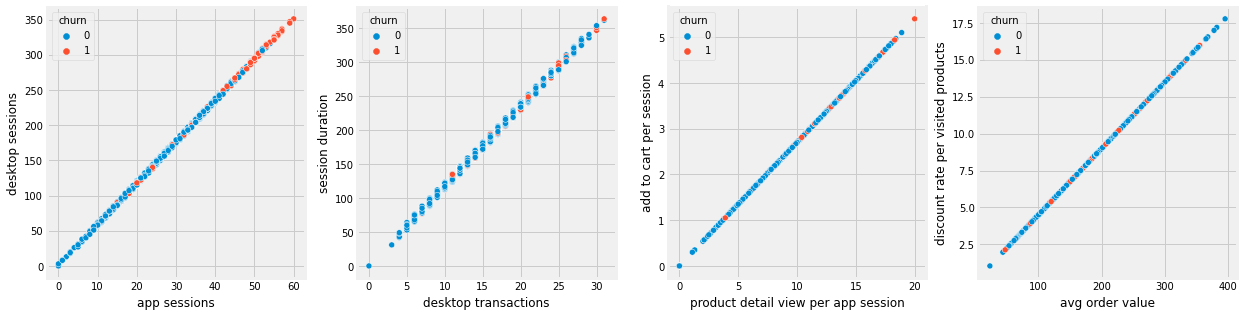

In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (19, 5))
sns.scatterplot(x = 'app sessions', y = 'desktop sessions', hue = 'churn', data = df, ax = axes[0])
sns.scatterplot(x = 'desktop transactions', y= 'session duration', hue = 'churn', data = df, ax = axes[1])
sns.scatterplot(x = 'product detail view per app session', y = 'add to cart per session',hue='churn', data = df, ax = axes[2])
sns.scatterplot(x = 'avg order value', y = 'discount rate per visited products', hue = 'churn', data = df, ax = axes[3])
plt.show()

* From first scatterplot, if a customer has visited application more than 40 times and website more than 250 times, probability customer will churn is smaller. This means if customer visit our application or website more it can be reduce probability customer will churn.
* From the second scatterplot, we can conclude that the more duration of customer sessions visiting our website / app, the more customers will make transactions through the website. Almost the same as scatterplot number one means that the business must be able to make customers visit our website or app more often so that more customers make transactions through the website and enter our business.
* From the third scatterplot, we can be concluded the average height of the number of product details seen by customers per session the higher also the average number of customers adding products to the cart per session.
* From the fourth scatterplot, we can conclude that the more discount rate of the average product seen by the customer, the more average the number of orders ordered by the customer. This means that customers like products with discounts. 

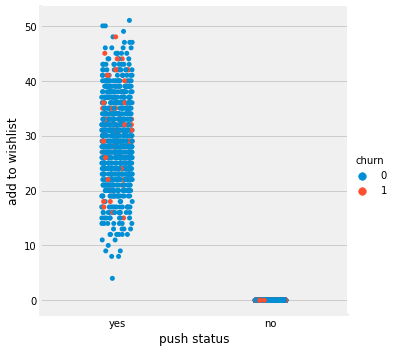

In [ ]:
sns.catplot(x='push status',y='add to wishlist',hue='churn',data=df)

from the catplot above, we conclude only customers who add goods to the wishlist that waste notifications in mobile. Businesses should evaluate why customers who don't add wishlists, don't allow or other? Do notifications annoy customers because they appear too often? If so we need to evaluate the duration of the notification appearance. Or because of other issues. Customer allows notifications is very important for business because businesses can tell if there are discounts or other promos through notifications. 

## Part 2 : Predictive Modelling

### Converting features into suitable for modeling

In [ ]:
df['push status'] = df['push status'].replace(['no', 'yes'], [0, 1])
df['credit card info save'] = df['credit card info save'].replace(['no', 'yes'], [0, 1])

df2 = pd.get_dummies(df)
df2.head()

,account length,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,location code_408,location code_415,location code_510
0,128,3824657,0,1,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,0,1,0
1,107,3717191,0,1,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,0,1,0
2,137,3581921,0,0,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0
3,84,3759999,1,0,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,1,0,0
4,75,3306626,1,0,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0


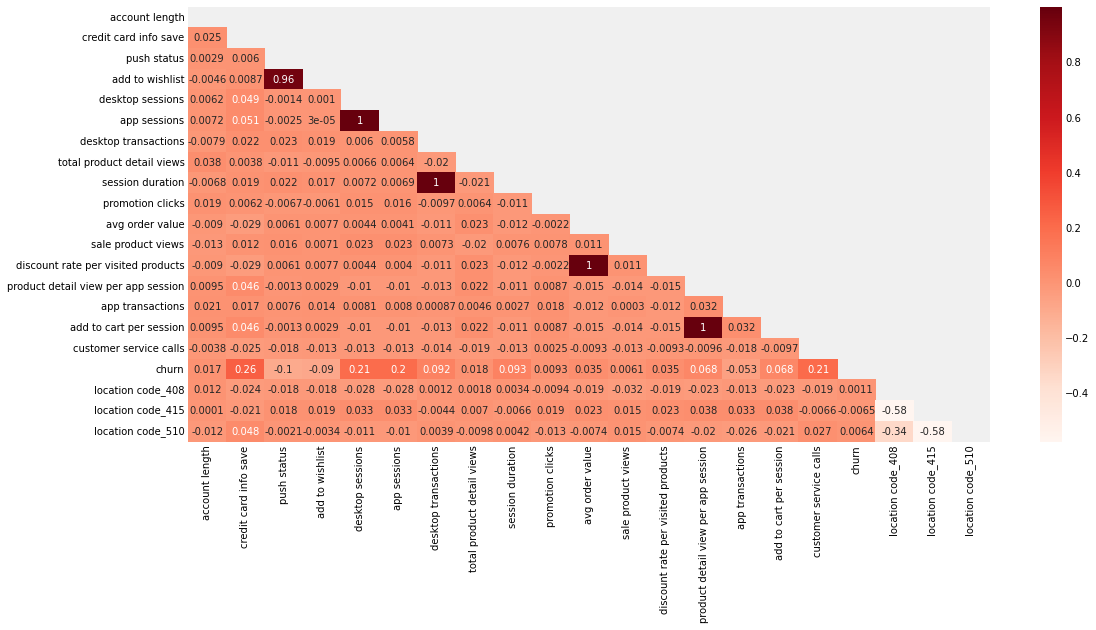

In [ ]:
plt.figure(figsize = (16,8))
corr = df2.drop(labels = ['user id'], axis = 1).corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot = True, cmap = 'Reds')
plt.show()

In [ ]:
# deleted some features have high correlation
df2.drop(columns = ['user id', 'add to wishlist', 'app sessions', 'session duration', 
                    'discount rate per visited products', 'product detail view per app session'], inplace = True)

In [ ]:
df2.head()

,account length,credit card info save,push status,desktop sessions,desktop transactions,total product detail views,promotion clicks,avg order value,sale product views,app transactions,add to cart per session,customer service calls,churn,location code_408,location code_415,location code_510
0,128,0,1,265,17,110,87,244.7,91,3,2.70,1,0,0,1,0
1,107,0,1,162,17,123,103,254.4,103,3,3.70,1,0,0,1,0
2,137,0,0,243,10,114,110,162.6,104,5,3.29,0,0,0,1,0
3,84,1,0,299,5,71,88,196.9,89,7,1.78,2,0,1,0,0
4,75,1,0,167,13,113,122,186.9,121,3,2.73,3,0,0,1,0


In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

In [ ]:
# define X and Y
X = df2.drop(columns = ['churn'])
y = df2[['churn']]

#scaling
scaler = RobustScaler()
X = scaler.fit_transform(X)

#split to train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

#smote
smote = SMOTE(random_state = 0)
x_train, y_train = smote.fit_resample(x_train, y_train)

### Running Basic Algorithms

#### SVM

In [ ]:
model = svm.SVC()
model.fit(x_train, y_train)
predLR = model.predict(x_test)
print(f"Report Metrics SVM \n {classification_report(y_test, predLR)}")

Report Metrics SVM 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       570
           1       0.63      0.84      0.72        97

    accuracy                           0.91       667
   macro avg       0.80      0.88      0.83       667
weighted avg       0.92      0.91      0.91       667



#### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predLR = model.predict(x_test)
print(f"Report Metrics Logistic Regression \n {classification_report(y_test, predLR)}")

Report Metrics Logistic Regression 
               precision    recall  f1-score   support

           0       0.94      0.77      0.85       570
           1       0.34      0.72      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.74      0.66       667
weighted avg       0.85      0.76      0.79       667



#### KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train, y_train)
predKNN = model.predict(x_test)
print(f"Report Metrics KNN \n {classification_report(y_test, predKNN)}")

Report Metrics KNN 
               precision    recall  f1-score   support

           0       0.94      0.78      0.86       570
           1       0.36      0.72      0.48        97

    accuracy                           0.77       667
   macro avg       0.65      0.75      0.67       667
weighted avg       0.86      0.77      0.80       667



#### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predDT = model.predict(x_test)
print(f"Report Metrics Decision Tree \n {classification_report(y_test, predDT)}")

Report Metrics Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       570
           1       0.58      0.74      0.65        97

    accuracy                           0.88       667
   macro avg       0.77      0.83      0.79       667
weighted avg       0.90      0.88      0.89       667



#### Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators = 140)
model.fit(x_train, y_train)
predRF = model.predict(x_test)
print(f"Report Metrics Random Forest \n {classification_report(y_test, predRF)}")

Report Metrics Random Forest 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       570
           1       0.84      0.80      0.82        97

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667



### Conclusion

Of the 5 machine learning models, we obtained a random forest model that has the highest accuracy value of 95%. With a recall value of 80% and a precision value of 84%, the recall value and precision value do not have a much difference.